In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2|

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd

from dsn.util import fct_integrals as integrals
from dsn.util import tf_integrals as tf_integrals

from dsn.util import fct_mf as mf



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
### Set parameters

Mm = 3.5      # Mean of m
Mn = 1.       # Mean of n
Mi = 0.0       # Mean of I

Sim = 1.      # Std of m
Sin = 1.      # Std of n
Sip = 1.0      # Std of input orthogonal to m and n, along h (see Methods)

g = 0.8
tol = 1e-10;

Sini_min = 0.0
Sini_max = 2.
num_vals = 40;
Sini_values = np.linspace(Sini_min, Sini_max, num_vals)

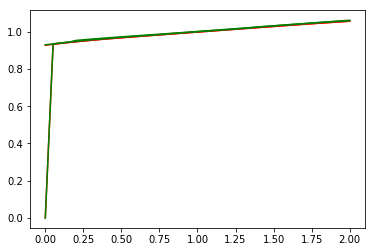

[[ 6.  6.  6.  6.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
   5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
   5.  5.  5.  5.]
 [ 5. 12. 11. 10. 10.  9.  9.  9.  9.  8.  8.  8.  8.  8.  8.  8.  7.  7.
   7.  7.  7.  7.  7.  7.  7.  7.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.
   6.  6.  6.  6.]]


In [41]:
ics_0 = np.array([1., 1., 1.], np.float64);
ics_1 = np.array([1., 1., 0.0], np.float64);
eps = 0.2;
eps_approx = 0.8;
tol_approx = 1e-2;

Ks_valid = np.zeros((2,num_vals));
Ks_approx = np.zeros((2,num_vals));
count_approx = np.zeros((2,num_vals));
for i in range(num_vals):
    Sini = Sini_values[i];
    ParVec = [Mm, Mn, Mi, Sim, Sin, Sini, Sip];
    
    ys, count = mf.SolveStatic(ics_0, g, ParVec, eps, tol);
    Ks_valid[0,i] = ys[-1,2];
    
    ys, count = mf.SolveStatic(ics_0, g, ParVec, eps_approx, tol_approx);
    Ks_approx[0,i] = ys[-1,2];
    count_approx[0,i] = count;
    
    ys, count = mf.SolveStatic(ics_1, g, ParVec, eps, tol);
    Ks_valid[1,i] = ys[-1,2];
    
    ys, count = mf.SolveStatic(ics_1, g, ParVec, eps_approx, tol_approx);
    Ks_approx[1,i] = ys[-1,2];
    count_approx[1,i] = count;
    
    
    
plt.figure();
plt.plot(Sini_values, Ks_valid.T, 'r');
plt.plot(Sini_values, Ks_approx.T, 'g');
plt.show();

print(count_approx);



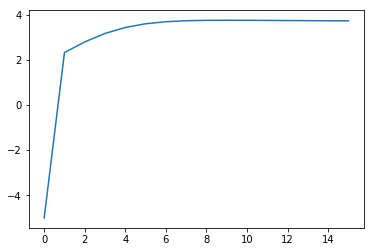

In [39]:
plt.plot(ys[:,0])